# Phishing Link Detection Machine Learning

Jonathan Christyadi (502705) - AI Core 02


This notebook aims at predicting the likelihood of a link being a phishing link or a legitimate link with a focus on exploring and testing hypotheses that necessitate further research.


Dataset: https://data.mendeley.com/datasets/c2gw7fy2j4/3

In [1]:
import sklearn
import pandas as pd
import seaborn
import numpy as np
print("scikit-learn version:", sklearn.__version__)     # 1.1.3
print("pandas version:", pd.__version__)            # 1.5.1
print("seaborn version:", seaborn.__version__)          # 0.12.1

scikit-learn version: 1.4.1.post1
pandas version: 2.2.1
seaborn version: 0.13.2


# 📦 Data provisioning

After loading the dataset, I found out some inconsistencies among the data. First the label of the link (phishing or legitimate) can be changed into binary format. Also, for domain_with_copyright column, some are in binary and some are written in alphabets, for example: zero, One, etc.

In [2]:
df = pd.read_csv("Data\dataset_link_phishing.csv", sep=',', index_col=False, dtype='unicode')
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank      status  
0         5    phishing  
1         0    phishing  
2         0    phishing  
3         0  legitimate  
4         4  legitimate  

[5 rows x 87 columns]

In [3]:
df.sample(5)

id                                                url url_length  \
15739  7738  https://cteam-my.sharepoint.com/:o:/g/personal...        126   
3077   3077  http://doc.google.share.pressurecookerindia.co...        150   
11363  3362                          https://www.sonlight.com/         25   
13001  5000   https://grabyourcode.com/paypal/adder/index.html         48   
7827   7827                   http://www.acostamueble.com/img/         32   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
15739              23  1         2         1         0         1         0   
3077               40  1         5         0         0         1         0   
11363              16  1         2         0         0         0         0   
13001              16  1         2         0         0         0         0   
7827               20  0         2         0         0         0         0   

       ... domain_in_title domain_with_copyright whois_registered_domain  \
15739  ...               1                     0                       0   
3077   ...               1                  zero                       0   
11363  ...               0                     0                       0   
13001  ...               1                     0                       0   
7827   ...               1                  zero                       0   

      domain_registration_length domain_age web_traffic dns_record  \
15739                        382       8018           0          0   
3077                         343       4405           0          0   
11363                       1379       7753      140382          0   
13001                        284       1541     2573053          0   
7827                         888       5321           0          0   

      google_index page_rank      status  
15739            1         4    phishing  
3077             1         0    phishing  
11363            0         4  legitimate  
13001            0         0    phishing  
7827             1         2    phishing  

[5 rows x 87 columns]

In [42]:
columns = df.columns.tolist()

with open("output.txt", "w") as file:
    for column in columns:
        file.write(column + "\n")



In [41]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19431 entries, 0 to 19430
Data columns (total 85 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   url_length                  19431 non-null  int64  
 1   hostname_length             19431 non-null  int64  
 2   ip                          19431 non-null  object 
 3   total_of.                   19431 non-null  int64  
 4   total_of-                   19431 non-null  int64  
 5   total_of@                   19431 non-null  object 
 6   total_of?                   19431 non-null  int64  
 7   total_of&                   19431 non-null  object 
 8   total_of=                   19431 non-null  object 
 9   total_of_                   19431 non-null  object 
 10  total_of~                   19431 non-null  object 
 11  total_of%                   19431 non-null  object 
 12  total_of/                   19431 non-null  int64  
 13  total_of*                   194

In [5]:
# Sampling the dataset

df.sample(10)

id                                                url url_length  \
12368  4367  http://bridgeburglar.com/bridge-burglars-guide...         77   
2116   2116                  http://sanangelo.iconcinemas.com/         33   
14707  6706     http://nintendo.wikia.com/wiki/Nintendo_Switch         46   
969     969  https://www.justice.gov/atr/blame-switchman-ru...         90   
8546    545                        https://www.azurepower.com/         27   
2176   2176  https://mail.parkhill.k12.mo.us/owa/auth/logon...        123   
15179  7178  https://login.microsoftonline.com/decee90c-ce0...        557   
17788  9787  http://www.payscale.com/research/US/Job=Magnet...         97   
4291   4291  http://starmak.com.tr/950CAAEA0281AA2BEBED8F9E...         76   
3559   3559                         https://s.free.fr/92rsZcB4         26   

      hostname_length ip total_of. total_of- total_of@ total_of? total_of&  \
12368              17  1         1         6         0         0         0   
2116               25  0         2         0         0         0         0   
14707              18  1         2         0         0         0         0   
969                15  0         2         7         0         0         0   
8546               18  1         2         0         0         0         0   
2176               23  0         9         0         0         1         1   
15179              25  1         5        24         0         1         9   
17788              16  1         2         0         0         0         0   
4291               14  1         2         0         0         1         0   
3559                9  0         2         0         0         0         0   

       ... domain_in_title domain_with_copyright whois_registered_domain  \
12368  ...               1                     1                       0   
2116   ...               1                  zero                       0   
14707  ...               1                     1                       0   
969    ...               1                   one                       0   
8546   ...               1                     1                       0   
2176   ...               1                  zero                       1   
15179  ...               1                     1                       0   
17788  ...               0                     0                       0   
4291   ...               1                  zero                       0   
3559   ...               1                  zero                       0   

      domain_registration_length domain_age web_traffic dns_record  \
12368                        161       2761     4459552          0   
2116                         135       3153     9482009          0   
14707                        140       6070       14420          0   
969                            0         -1        4382          0   
8546                        1119       4724      942542          0   
2176                           0         -1      105946          0   
15179                        350       6589          30          0   
17788                       1290       7841        3990          0   
4291                           0       4376           0          0   
3559                         518       7800     2868149          0   

      google_index page_rank      status  
12368            0         1  legitimate  
2116             0         3  legitimate  
14707            0         5  legitimate  
969              0         6  legitimate  
8546             0         4  legitimate  
2176             1         4    phishing  
15179            1         4  legitimate  
17788            0         5  legitimate  
4291             1         1    phishing  
3559             1         5    phishing  

[10 rows x 87 columns]

# Preprocessing

## 🆔 Encoding


In [6]:
df['status'] = df['status'].map({'phishing': 1, 'legitimate': 0})
df.head()

id                                                url url_length  \
0  0     http://www.progarchives.com/album.asp?id=61737         46   
1  1  http://signin.eday.co.uk.ws.edayisapi.dllsign....        128   
2  2  http://www.avevaconstruction.com/blesstool/ima...         52   
3  3                              http://www.jp519.com/         21   
4  4                       https://www.velocidrone.com/         28   

  hostname_length ip total_of. total_of- total_of@ total_of? total_of&  ...  \
0              20  0         3         0         0         1         0  ...   
1             120  0        10         0         0         0         0  ...   
2              25  0         3         0         0         0         0  ...   
3              13  0         2         0         0         0         0  ...   
4              19  0         2         0         0         0         0  ...   

  domain_in_title domain_with_copyright whois_registered_domain  \
0               1                   one                       0   
1               1                  zero                       0   
2               1                  zero                       0   
3               1                   one                       0   
4               0                  zero                       0   

  domain_registration_length domain_age web_traffic dns_record google_index  \
0                        627       6678       78526          0            0   
1                        300         65           0          0            1   
2                        119       1707           0          0            1   
3                        130       1331           0          0            0   
4                        164       1662      312044          0            0   

  page_rank status  
0         5      1  
1         0      1  
2         0      1  
3         0      0  
4         4      0  

[5 rows x 87 columns]

In [7]:
df['domain_with_copyright'] = df['domain_with_copyright'].map({'one': 1, 'zero': 0, 'Zero': 0, 'One': 1,'1': 1, '0': 0}).astype(int)
df['domain_with_copyright'].unique()

array([1, 0])

### Checking null or NaN values

In [8]:
# Calculate the total number of missing values in the DataFrame
total_na = df.isna().sum()



In [9]:
# Calculate the total number of missing values in the DataFrame
total_null = df.isnull().sum()
total_null.sum()


0

In [77]:
# Finding columns with binary values

def count_binary_columns(df):
    results = []
    counter = 0
    for col in df.columns:
        counter += 1
        if df[col].isin([0, 1]).all():
            results.append(col)
    return results, counter


count_binary_columns(df)

(['domain_in_title', 'domain_with_copyright', 'google_index', 'status'], 85)

In [10]:
df = df.drop(columns=['id', 'url'])
df.head()

url_length hostname_length ip total_of. total_of- total_of@ total_of?  \
0         46              20  0         3         0         0         1   
1        128             120  0        10         0         0         0   
2         52              25  0         3         0         0         0   
3         21              13  0         2         0         0         0   
4         28              19  0         2         0         0         0   

  total_of& total_of= total_of_  ... domain_in_title domain_with_copyright  \
0         0         1         0  ...               1                     1   
1         0         0         0  ...               1                     0   
2         0         0         0  ...               1                     0   
3         0         0         0  ...               1                     1   
4         0         0         0  ...               0                     0   

  whois_registered_domain domain_registration_length domain_age web_traffic  \
0                       0                        627       6678       78526   
1                       0                        300         65           0   
2                       0                        119       1707           0   
3                       0                        130       1331           0   
4                       0                        164       1662      312044   

  dns_record google_index page_rank status  
0          0            0         5      1  
1          0            1         0      1  
2          0            1         0      1  
3          0            0         0      0  
4          0            0         4      0  

[5 rows x 85 columns]

In [63]:
df['whois_registered_domain'].unique()

array(['0', '1'], dtype=object)

status
0    9716
1    9715
Name: count, dtype: int64


<Axes: title={'center': 'Count the target variable'}, xlabel='status'>

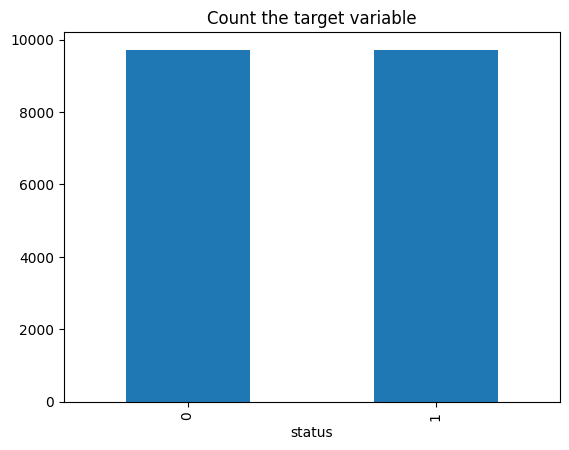

In [11]:
print(df['status'].value_counts())
df['status'].value_counts().plot(kind='bar', title='Count the target variable')    


## 💡 Feature selection

A heatmap will be used to select a suitable set of features to predict the `status` target upon. At this stage, I have zero idea which feature to use and I utilized heatmap to find features with the most corellation with the target feature.

In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

corr = df.corr()
plt.figure(figsize=(100, 100))
plot = sns.heatmap(corr, annot=True, fmt='.2f', linewidths=2)


<Axes: title={'center': 'Correlation with the target variable'}>

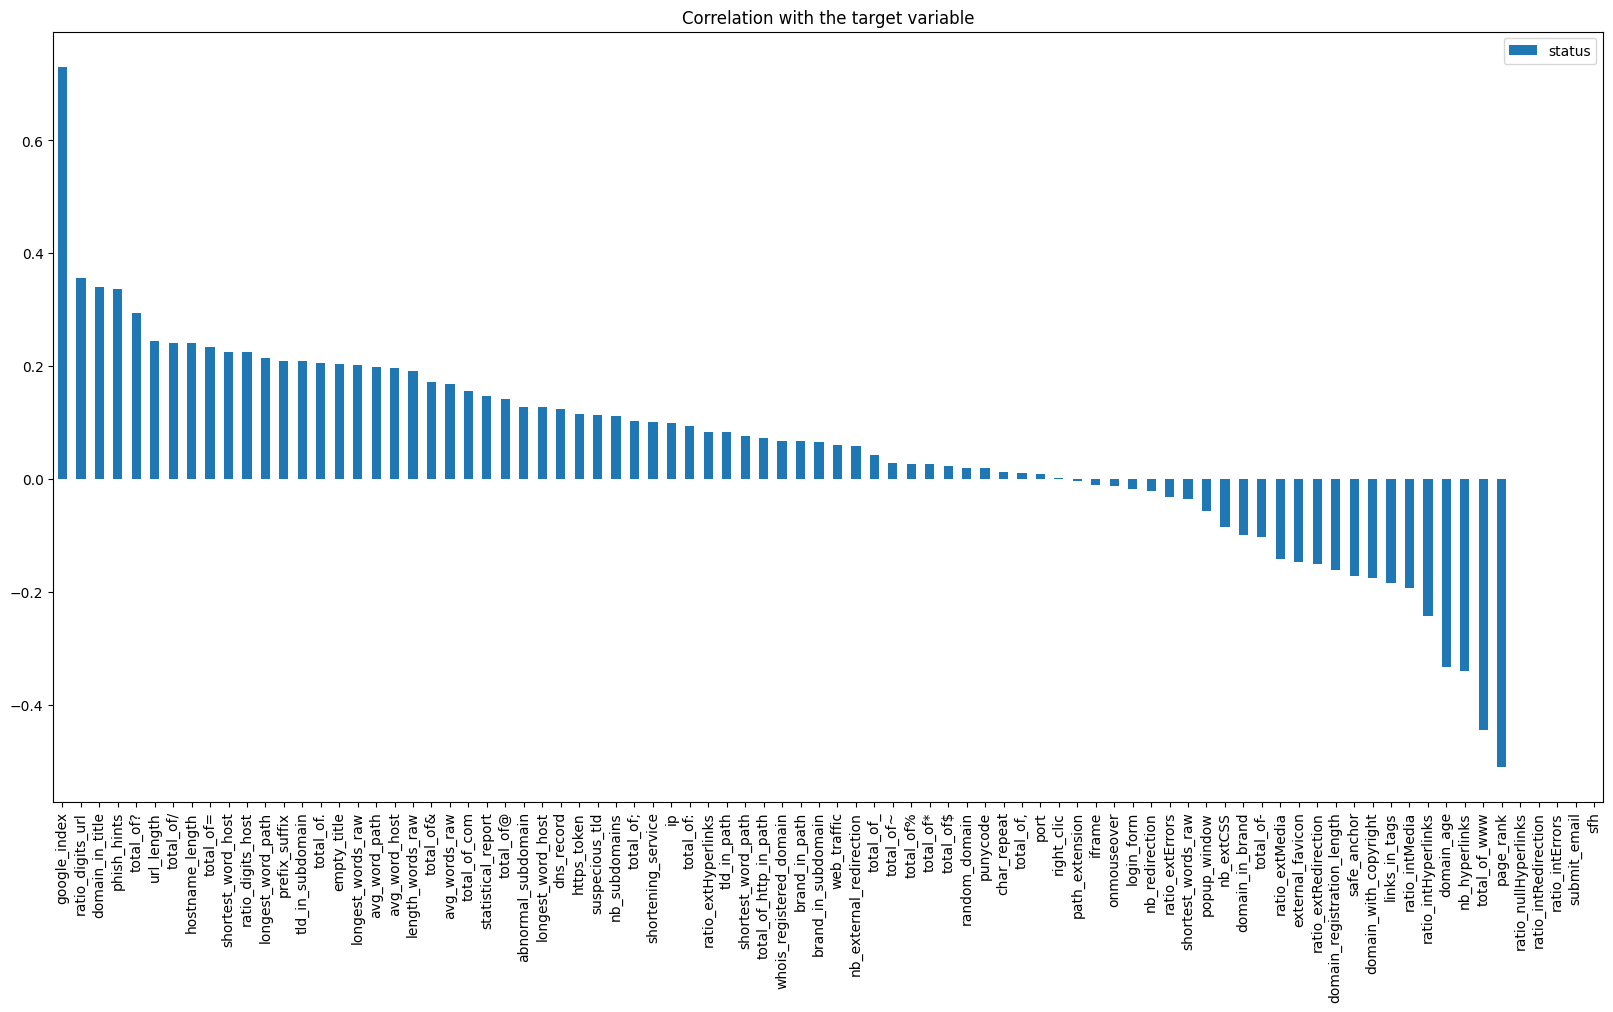

In [38]:
# Sorting the correlation values with the target variable in descending order
corr.drop('status').sort_values(by='status', ascending=False).plot.bar(y='status', title='Correlation with the target variable', figsize=(20, 10))


In [45]:
# Finding the most correlated features with the target variable based on numerical featrures excluding NaN values
correlation_matrix = df.corr(numeric_only=True)
sorted_corr = correlation_matrix.sort_values(by='status',ascending=False)
sorted_corr

url_length  hostname_length  total_of.  total_of-  \
status                   0.244348         0.240681   0.205302  -0.102849   
google_index             0.233061         0.216919   0.208764  -0.018285   
ratio_digits_url         0.434626         0.171761   0.224194   0.110341   
domain_in_title          0.124224         0.218850   0.108442   0.009843   
phish_hints              0.332000        -0.019901   0.168765   0.065562   
total_of?                0.523172         0.164129   0.353133   0.035958   
url_length               1.000000         0.217586   0.447198   0.406951   
total_of/                0.486490        -0.061203   0.242216   0.204793   
hostname_length          0.217586         1.000000   0.406834   0.059480   
total_of.                0.447198         0.406834   1.000000   0.049303   
total_of-                0.406951         0.059480   0.049303   1.000000   
domain_with_copyright   -0.004281         0.073107   0.057320   0.020914   
nb_hyperlinks           -0.098101        -0.104614  -0.093994  -0.004513   
total_of_www            -0.067973        -0.130991   0.068290   0.045756   
page_rank               -0.099900        -0.160621  -0.098752   0.104676   

                       total_of?  total_of/  total_of_www  ratio_digits_url  \
status                  0.293920   0.240892     -0.444561          0.356587   
google_index            0.202097   0.289212     -0.357215          0.323157   
ratio_digits_url        0.325739   0.206925     -0.211165          1.000000   
domain_in_title         0.092191   0.088462     -0.178402          0.152393   
phish_hints             0.208052   0.501321     -0.090812          0.096967   
total_of?               1.000000   0.243749     -0.115337          0.325739   
url_length              0.523172   0.486490     -0.067973          0.434626   
total_of/               0.243749   1.000000     -0.005628          0.206925   
hostname_length         0.164129  -0.061203     -0.130991          0.171761   
total_of.               0.353133   0.242216      0.068290          0.224194   
total_of-               0.035958   0.204793      0.045756          0.110341   
domain_with_copyright  -0.046123  -0.023213      0.087826         -0.027357   
nb_hyperlinks          -0.112604  -0.073183      0.114259         -0.128915   
total_of_www           -0.115337  -0.005628      1.000000         -0.211165   
page_rank              -0.123151  -0.113861      0.110745         -0.181489   

                       phish_hints  nb_hyperlinks  domain_in_title  \
status                    0.337287      -0.341295         0.339519   
google_index              0.279906      -0.269482         0.265933   
ratio_digits_url          0.096967      -0.128915         0.152393   
domain_in_title           0.125857      -0.217548         1.000000   
phish_hints               1.000000      -0.112423         0.125857   
total_of?                 0.208052      -0.112604         0.092191   
url_length                0.332000      -0.098101         0.124224   
total_of/                 0.501321      -0.073183         0.088462   
hostname_length          -0.019901      -0.104614         0.218850   
total_of.                 0.168765      -0.093994         0.108442   
total_of-                 0.065562      -0.004513         0.009843   
domain_with_copyright    -0.066130       0.192159         0.076105   
nb_hyperlinks            -0.112423       1.000000        -0.217548   
total_of_www             -0.090812       0.114259        -0.178402   
page_rank                -0.203464       0.221066        -0.332742   

                       domain_with_copyright  google_index  page_rank  \
status                             -0.175469      0.730684  -0.509761   
google_index                       -0.144499      1.000000  -0.386721   
ratio_digits_url                   -0.027357      0.323157  -0.181489   
domain_in_title                     0.076105      0.265933  -0.332742   
phish_hints                        -0.066130      0.279

In [49]:
# Get all the correlated features with the target variable
num_features = len(sorted_corr['status']) # 15 features
sorted_corr['status'].head(num_features)

status                   1.000000
google_index             0.730684
ratio_digits_url         0.356587
domain_in_title          0.339519
phish_hints              0.337287
total_of?                0.293920
url_length               0.244348
total_of/                0.240892
hostname_length          0.240681
total_of.                0.205302
total_of-               -0.102849
domain_with_copyright   -0.175469
nb_hyperlinks           -0.341295
total_of_www            -0.444561
page_rank               -0.509761
Name: status, dtype: float64

In [15]:
# List the features from the previous step into a list
# selected_features = ['google_index', 'ratio_digits_url', 'domain_in_title', 'phish_hints', 'total_of?', 'url_length', 'total_of/','hostname_length','total_of.', 'total_of-','domain_with_copyright','nb_hyperlinks','total_of_www','page_rank']
selected_features = sorted_corr['status'].head(num_features).index.tolist()
df[selected_features] = df[selected_features].apply(pd.to_numeric, errors='coerce')

# Check the data types of the selected columns after conversion
print(df[selected_features].dtypes)

# Check if 'status' column exists and has categorical or numerical data
print(df['status'].dtype)

# Create a DataFrame with the selected columns
selected_df = df[selected_features + ['status']]
selected_df.head()

google_index               int64
ratio_digits_url         float64
domain_in_title            int64
phish_hints                int64
total_of?                  int64
url_length                 int64
total_of/                  int64
hostname_length            int64
total_of.                  int64
total_of-                  int64
domain_with_copyright      int32
nb_hyperlinks              int64
total_of_www               int64
page_rank                  int64
dtype: object
int64


google_index  ratio_digits_url  domain_in_title  phish_hints  total_of?  \
0             0          0.108696                1            0          1   
1             1          0.054688                1            2          0   
2             1          0.000000                1            0          0   
3             0          0.142857                1            0          0   
4             0          0.000000                0            0          0   

   url_length  total_of/  hostname_length  total_of.  total_of-  \
0          46          3               20          3          0   
1         128          3              120         10          0   
2          52          4               25          3          0   
3          21          3               13          2          0   
4          28          3               19          2          0   

   domain_with_copyright  nb_hyperlinks  total_of_www  page_rank  status  
0                      1            143             1          5       1  
1                      0              0             0          0       1  
2                      0              3             1          0       1  
3                      1            404             1          0       0  
4                      0             57             1          4       0

In [81]:
# Count the number of binary columns in the selected features

features_binary = count_binary_columns(df[selected_features])
features_binary


['status',
 'google_index',
 'ratio_digits_url',
 'domain_in_title',
 'phish_hints',
 'total_of?',
 'url_length',
 'total_of/',
 'hostname_length',
 'total_of.',
 'total_of-',
 'domain_with_copyright',
 'nb_hyperlinks',
 'total_of_www',
 'page_rank']

In [16]:
from sklearn.preprocessing import StandardScaler
# Scale the data
selected_df = selected_df.dropna()
scaler = StandardScaler()
selected_df[selected_features] = scaler.fit_transform(selected_df[selected_features])


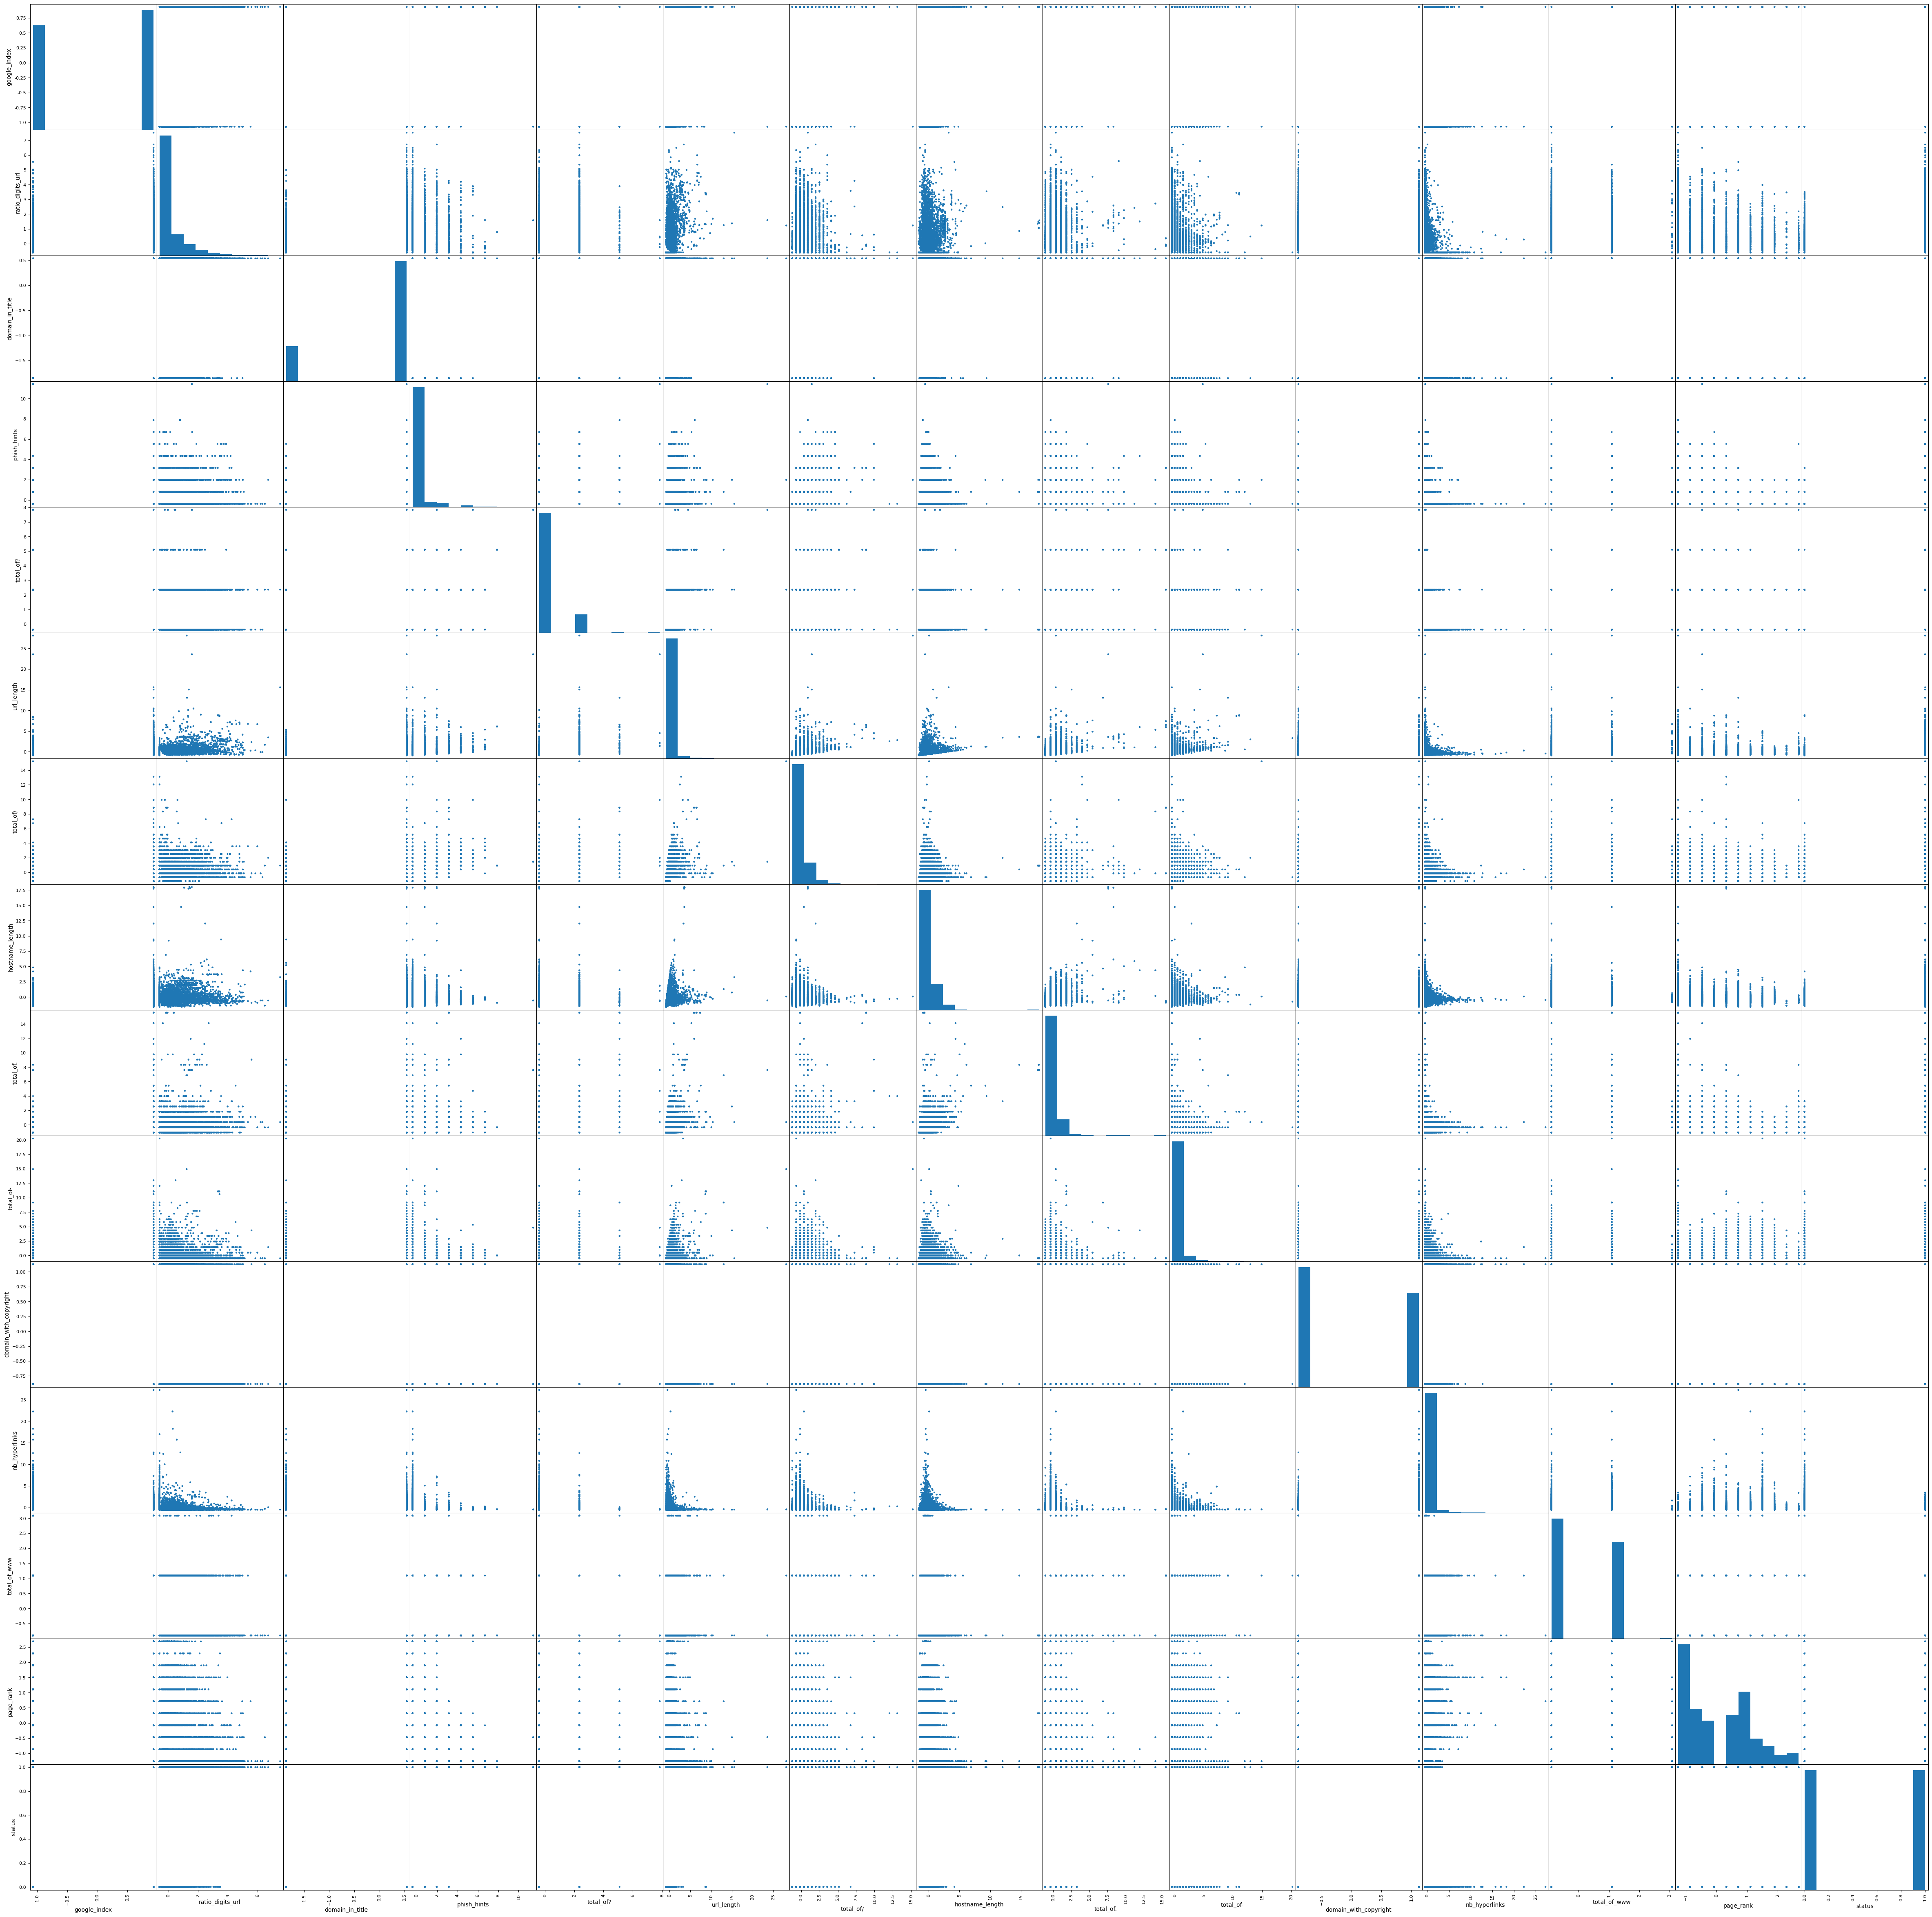

In [17]:
from pandas.plotting import scatter_matrix
scatter_matrix(selected_df, alpha=1, figsize=(60, 60), diagonal='hist')
plt.show()

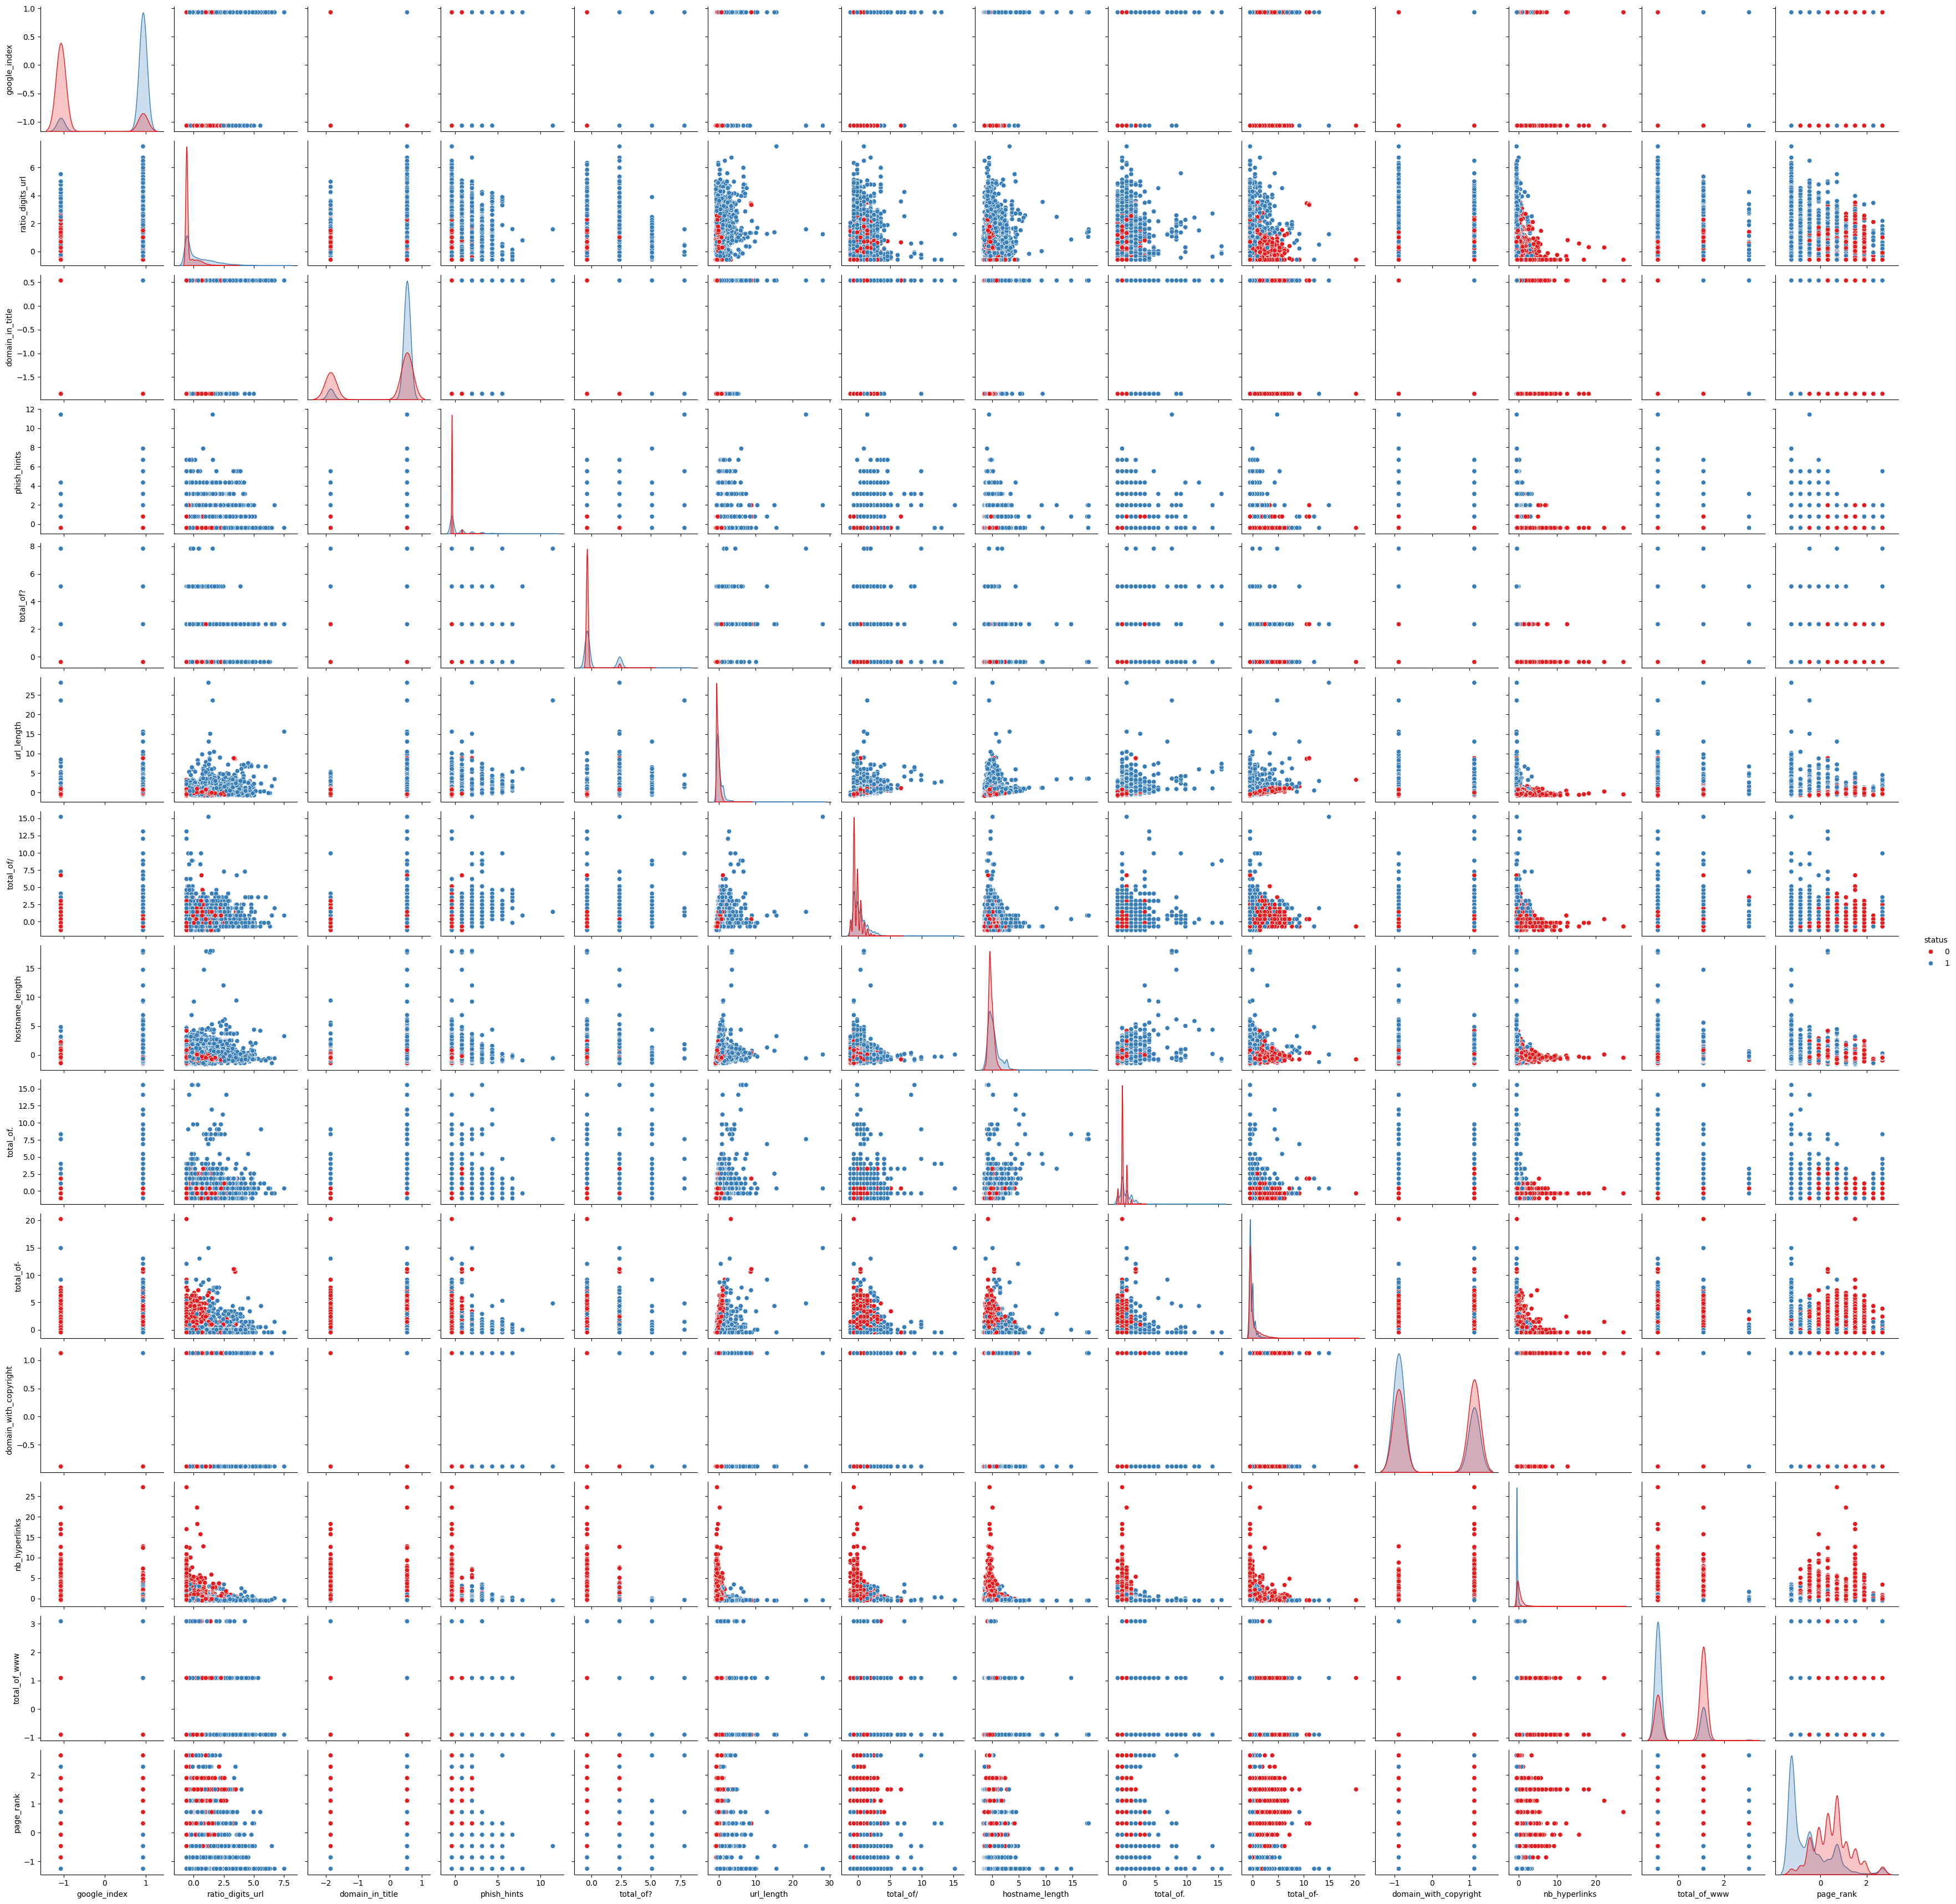

In [18]:
# Create pairplot
sns.pairplot(selected_df, hue='status', palette='Set1')

# Show the plot
plt.show()

In [19]:
target = 'status'

X = df[selected_features]
y = df[target]

## 🪓 Splitting into train/test

In [20]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2)
print("There are in total", len(X), "observations, of which", len(X_train), "are now in the train set, and", len(X_test), "in the test set.")

There are in total 19431 observations, of which 15544 are now in the train set, and 3887 in the test set.


# 🧬 Modelling


### Support Vector Machine

In [21]:
# SUPPORT VECTOR MACHINE SVM
from sklearn.svm import SVC
model = SVC()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.8422948289169025


In [22]:
from sklearn.metrics import classification_report
predictions = model.predict(X_test)
report = classification_report(y_test, predictions)
print(report)

              precision    recall  f1-score   support

           0       0.87      0.82      0.84      1982
           1       0.82      0.87      0.84      1905

    accuracy                           0.84      3887
   macro avg       0.84      0.84      0.84      3887
weighted avg       0.84      0.84      0.84      3887



### Linear Regression

In [23]:
# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
model = LinearRegression()
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("R²:", score)

R²: 0.6897128732856885


IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html


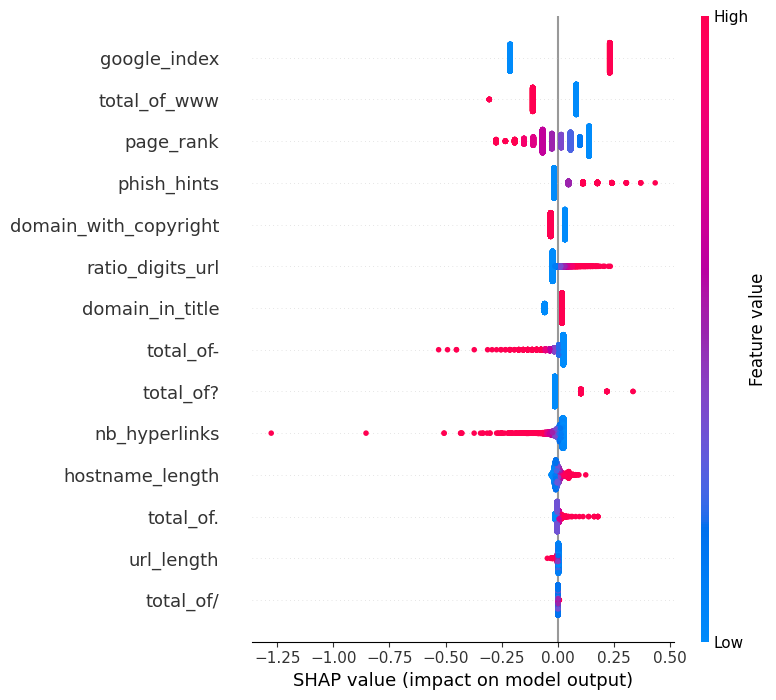

In [24]:
import shap

# Shap explainer initialized with the model and training data
explainer = shap.Explainer(model, X_train)

# Calculate Shap values for the predictions made on the test set
shap_values = explainer.shap_values(X_test)

# Plot the Shap values using bee swarm plot
shap.summary_plot(shap_values, X_test)

### 🏘️ K-NEAREST NEIGBOURS

In [25]:
# K-NEAREST NEIGHBORS

from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier(n_neighbors=4)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9114998713660921


### 🌲Decision Tree

In [26]:
# DECISION TREE

from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier(min_samples_leaf=40, min_samples_split=300)
model.fit(X_train, y_train)
score = model.score(X_test, y_test)
print("Accuracy:", score)

Accuracy: 0.9336249035245691


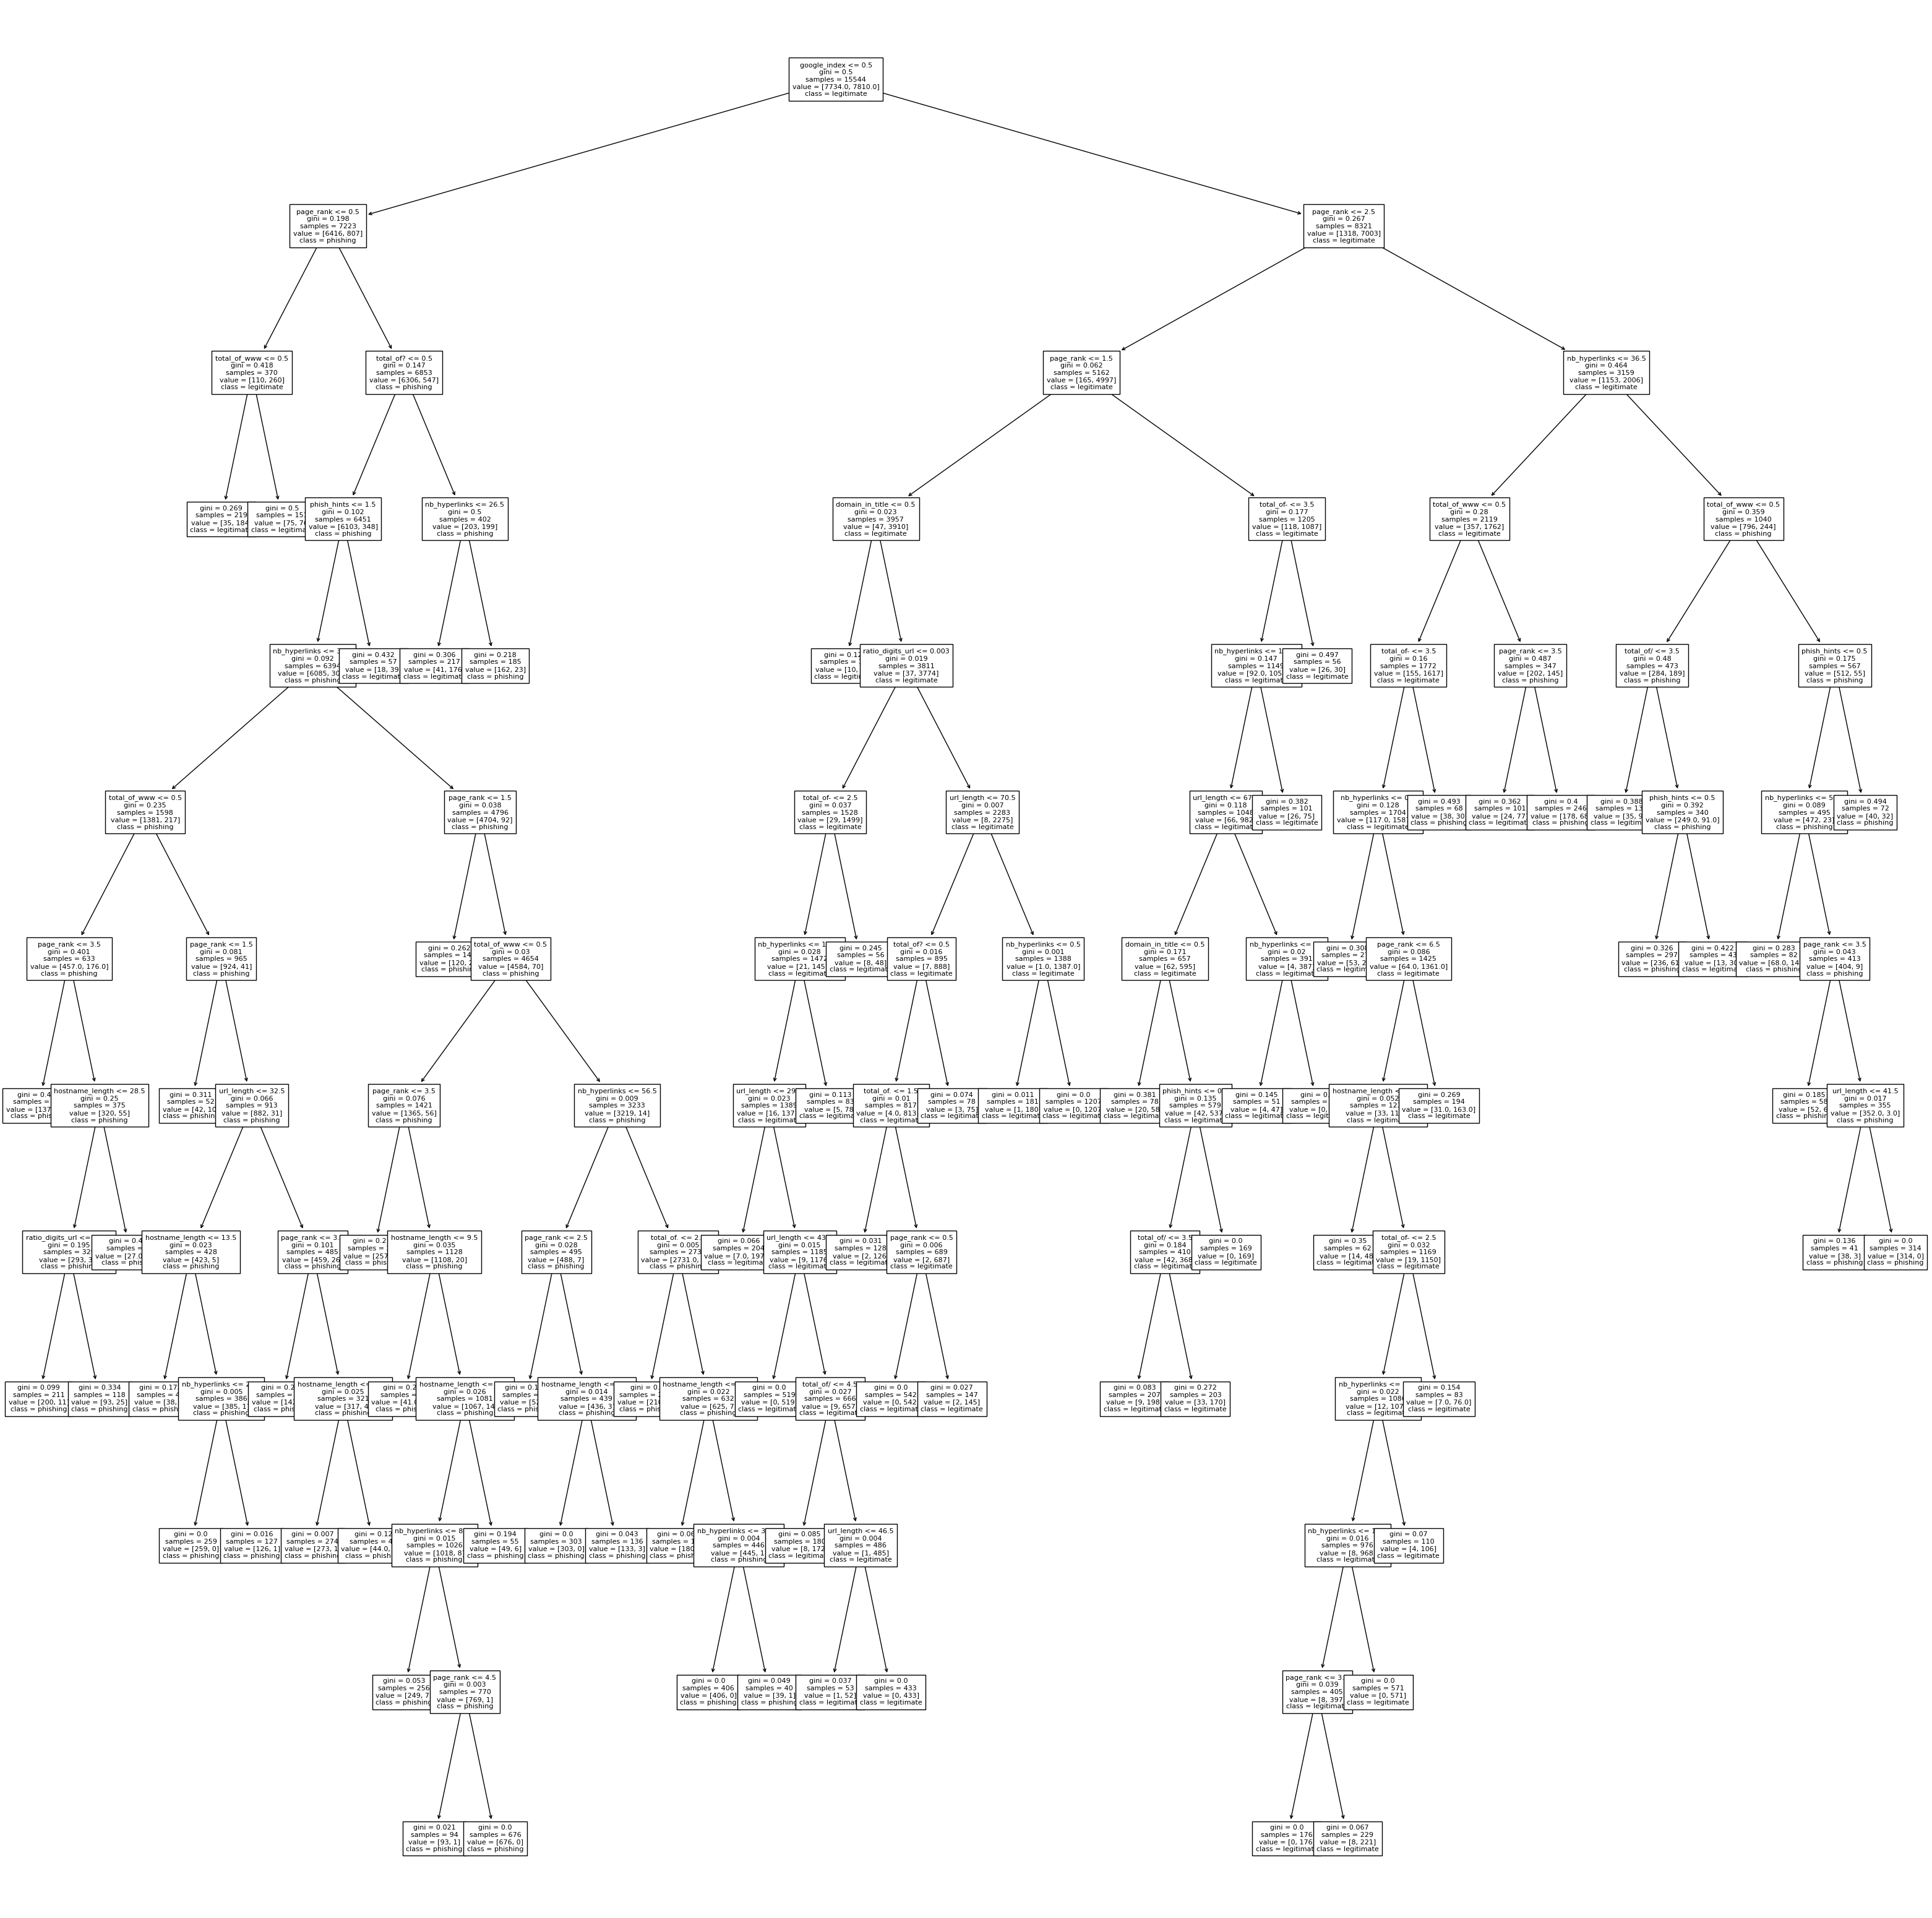

In [27]:
target_names = ["phishing", "legitimate"]
import matplotlib.pyplot as plt
plt.figure(figsize=(40,40))
from sklearn.tree import plot_tree
plot_tree(model, fontsize=8, feature_names=selected_features, class_names=target_names)
plt.show()